In [ ]:
!pip3 install torchvision
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms,models

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu') 

In [ ]:
!git clone https://github.com/jaddoescad/ants_and_bees.git


Cloning into 'ants_and_bees'...
remote: Enumerating objects: 408, done.
remote: Total 408 (delta 0), reused 0 (delta 0), pack-reused 408
Receiving objects: 100% (408/408), 45.03 MiB | 42.19 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!ls ants_and_bees/val

ants  bees


In [ ]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(10),
                               transforms.RandomAffine(0, shear = 10 , scale=(0.8,1.2)),
                               transforms.ColorJitter(brightness = 1, contrast = 0.2, saturation = 0.2),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                              ])


transform = transforms.Compose([transforms.Resize((224,224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                              ])
training_datasets = datasets.ImageFolder('ants_and_bees/train', transform = transform_train)
validation_datasets = datasets.ImageFolder('ants_and_bees/val', transform = transform)

train_loader = torch.utils.data.DataLoader(dataset=training_datasets,batch_size = 20,shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_datasets,batch_size = 20,shuffle = False)

In [ ]:
print(len(training_datasets), len(validation_datasets))

244 153


In [ ]:
training_datasets

Dataset ImageFolder
    Number of datapoints: 244
    Root location: ants_and_bees/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=(-10, 10), resample=False, expand=False)
               RandomAffine(degrees=(0, 0), scale=(0.8, 1.2), shear=(-10, 10))
               ColorJitter(brightness=[0.0, 2.0], contrast=[0.8, 1.2], saturation=[0.8, 1.2], hue=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
training_datasets[0][0].shape

torch.Size([3, 224, 224])

In [ ]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  print(image.shape)
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5)) 
  image = image.clip(0,1)
  return image

In [ ]:
classes = ['ant','bee']

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


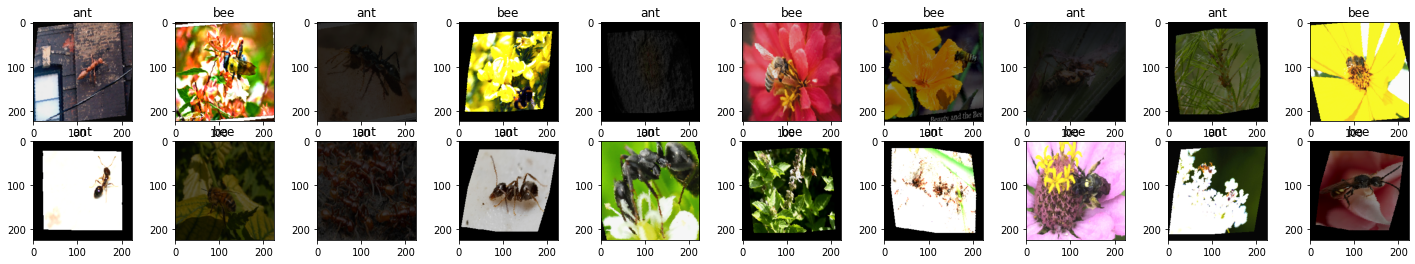

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.set_title(classes[labels[i].item()])

In [ ]:
model = models.alexnet(pretrained = True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
model.parameters

<bound method Module.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=92

In [ ]:
for param in model.features.parameters():
  param.requires_grad = False

In [ ]:
from torch import nn

In [ ]:
n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs,len(classes))
model.classifier[6] = last_layer

In [ ]:
model.parameters

<bound method Module.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=92

In [ ]:
print(model.classifier[6].out_features)

2


In [ ]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001)

In [ ]:
epochs = 10
running_loss_history = []
running_correct_history = []
validation_running_loss_history = []
validation_running_correct_history = []
for i in range(epochs):
  running_loss = 0.0
  running_correct = 0.0
  validation_running_loss = 0.0
  validation_running_correct = 0.0
  for inputs, labels in train_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    outputs = model.forward(inputs)
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    _,pred = torch.max(outputs,1)
    running_correct += torch.sum(pred == labels.data)
  else:
    with torch.no_grad():
      for val_inputs,val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model.forward(val_inputs)
        val_loss = criterion(val_outputs,val_labels)
        validation_running_loss += val_loss.item()
        _,val_pred = torch.max(val_outputs,1)
        validation_running_correct += torch.sum(val_pred == val_labels.data)

    epoch_loss = running_loss/len(train_loader.dataset)
    epoch_accuracy = running_correct.float()/len(train_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_correct_history.append(epoch_accuracy)

    val_epoch_loss = validation_running_loss/len(validation_loader.dataset)
    val_epoch_accuracy = validation_running_correct.float()/len(validation_loader.dataset)
    validation_running_loss_history.append(val_epoch_loss)
    validation_running_correct_history.append(val_epoch_accuracy)

    print('epoch is {}'.format(i))
    print('training_loss {:.4f}, training_accuracy {:.4f}'.format(epoch_loss, epoch_accuracy.item()))
    print('val_training_loss {:.4f}, val_training_accuracy {:.4f}'.format(val_epoch_loss, val_epoch_accuracy.item())) 

epoch is 0
training_loss 0.0313, training_accuracy 0.6598
val_training_loss 0.0179, val_training_accuracy 0.8431
epoch is 1
training_loss 0.0228, training_accuracy 0.8279
val_training_loss 0.0165, val_training_accuracy 0.8889
epoch is 2
training_loss 0.0249, training_accuracy 0.7828
val_training_loss 0.0186, val_training_accuracy 0.8758
epoch is 3
training_loss 0.0187, training_accuracy 0.8238
val_training_loss 0.0152, val_training_accuracy 0.8758
epoch is 4
training_loss 0.0154, training_accuracy 0.8484
val_training_loss 0.0135, val_training_accuracy 0.9020
epoch is 5
training_loss 0.0161, training_accuracy 0.8689
val_training_loss 0.0173, val_training_accuracy 0.9085
epoch is 6
training_loss 0.0127, training_accuracy 0.8934
val_training_loss 0.0153, val_training_accuracy 0.9216
epoch is 7
training_loss 0.0121, training_accuracy 0.9057
val_training_loss 0.0173, val_training_accuracy 0.8889
epoch is 8
training_loss 0.0087, training_accuracy 0.9180
val_training_loss 0.0203, val_training

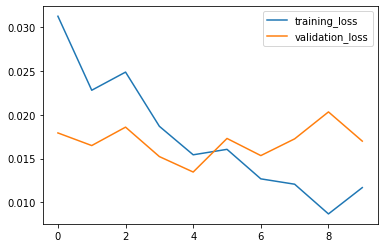

In [ ]:
plt.plot(running_loss_history,label = 'training_loss')
plt.plot(validation_running_loss_history,label = 'validation_loss')
plt.legend()

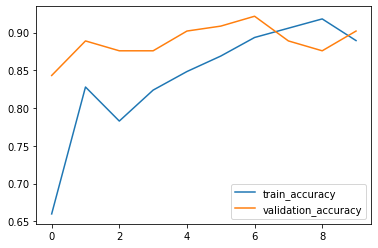

In [ ]:
plt.plot(running_correct_history, label = 'train_accuracy')
plt.plot(validation_running_correct_history, label = 'validation_accuracy')
plt.legend()

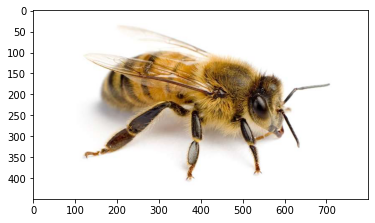

In [ ]:
import requests
from PIL import Image
url = "https://cdn.britannica.com/s:800x450,c:crop/78/192578-138-DC7C6A32/conservation-efforts-bee-populations-plant-animal-species.jpg"
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

(224, 224, 3)


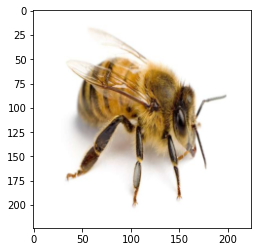

In [ ]:
import PIL.ImageOps
from PIL import ImageMath

img = transform(img)
plt.imshow(im_convert(img))

In [ ]:
img = img.to(device).unsqueeze(0)

output = model.forward(img)
_,pred = torch.max(output,1)
print(classes[pred.item()])

bee


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


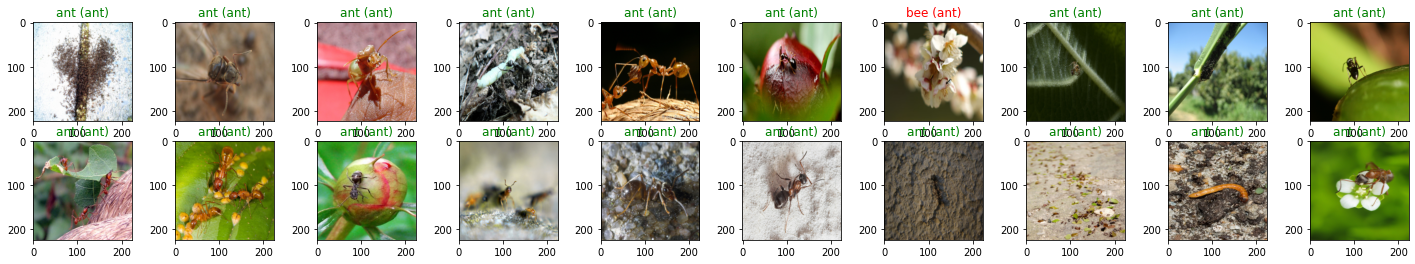

In [27]:
dataiter = iter(validation_loader)
images,labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
outputs = model.forward(images)
_,pred = torch.max(outputs,1)

fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.set_title("{} ({})".format(str(classes[pred[i].item()]), str(classes[labels[i].item()])), color =('green' if pred[i]==labels[i] else 'red'))